In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
lng_df = pd.read_csv('lng_df.csv', parse_dates = ['Date'], index_col = 'Date')
lng_df.head()

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,
1995-08-11,42.00,0.0,42.00,0.000,0.166667,0.877551,99.835985,0.841667,97.042609,0.794286,89.026745,0.675536,46.999192,-1.000000,-1.000000,0,0,0,1
1995-10-23,39.00,0.0,39.00,0.000,-0.161290,1.115385,28.969562,1.094872,41.377227,1.087692,50.432460,0.851538,46.056387,-1.000000,-1.000000,0,0,0,0
1995-11-01,38.28,0.0,38.28,0.000,-0.018462,1.086095,25.992179,1.095925,38.638756,1.096426,47.971520,0.879710,45.790450,-1.000000,-1.000000,0,1,0,0
1995-11-13,48.00,0.0,42.00,-0.125,0.253918,0.830714,78.916200,0.866833,71.746827,0.870100,70.676817,0.714244,49.858929,-1.000000,-1.000000,0,0,0,0
1995-11-15,42.00,400.0,42.00,0.000,0.097179,0.964694,51.523891,0.993048,52.655408,0.995829,55.071995,0.820564,47.624751,-0.973333,-0.994667,0,1,0,0


In [3]:
features = lng_df.iloc[:300][['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']]
targets = lng_df.iloc[:300]['5d_close_future_pct']

In [4]:
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

In [5]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

### Build and fit a simple neural net

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
255/255 [==============================] - 0s 700us/step - loss: 0.1011
Epoch 2/25
255/255 [==============================] - 0s 42us/step - loss: 0.0340
Epoch 3/25
255/255 [==============================] - 0s 58us/step - loss: 0.0242
Epoch 4/25
255/255 [==============================] - 0s 55us/step - loss: 0.0167
Epoch 5/25
255/255 [==============================] - 0s 38us/step - loss: 0.0144
Epoch 6/25
255/255 [==============================] - 0s 48us/step - loss: 0.0131
Epoch 7/25
255/255 [==============================] - 0s 42us/step - loss: 0.0117
Epoch 8/25
255/255 [==============================] - 0s 47us/step - loss: 0.0108
Epoch 9/25
255/255 [==============================] - 0s 35us/step - loss: 0.0103
Epoch 10/25
255/255 [==============================] - 0s 46us/step - loss: 0.0097
Epoch 11/25
255/255 [==============================] - 0s 

### Plot losses

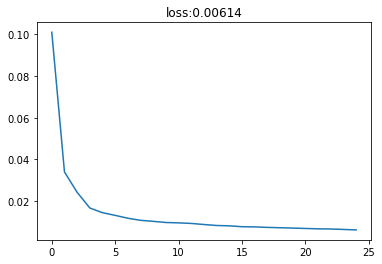

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
1995-08-11      0.166667  0.877551  99.835985  0.841667  97.042609  0.794286   
1995-10-23     -0.161290  1.115385  28.969562  1.094872  41.377227  1.087692   
1995-11-01     -0.018462  1.086095  25.992179  1.095925  38.638756  1.096426   
1995-11-13      0.253918  0.830714  78.916200  0.866833  71.746827  0.870100   
1995-11-15      0.097179  0.964694  51.523891  0.993048  52.655408  0.995829   

                rsi50     ma200     rsi200  Adj_Volume_1d_change  \
Date                                                               
1995-08-11  89.026745  0.675536  46.999192             -1.000000   
1995-10-23  50.432460  0.851538  46.056387             -1.000000   
1995-11-01  47.971520  0.879710  45.790450             -1.000000   
1995-11-13  70.676817  0.714244  49.858929             -1.000000   
1995-11-15  55.071995  0.820564

In [7]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

print(train_features.head())

### Measure performance

0.5648519581549492
-1.1151264775942593


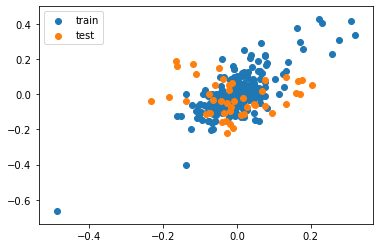

In [8]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label = 'test')
plt.legend()
plt.show()

### Custom loss function

In [9]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x10fe50f28>


### Fit neural net with custom loss function

Epoch 1/25
255/255 [==============================] - 0s 812us/step - loss: 2.4074
Epoch 2/25
255/255 [==============================] - 0s 46us/step - loss: 1.1655
Epoch 3/25
255/255 [==============================] - 0s 50us/step - loss: 0.6337
Epoch 4/25
255/255 [==============================] - 0s 45us/step - loss: 0.6520
Epoch 5/25
255/255 [==============================] - 0s 36us/step - loss: 0.4788
Epoch 6/25
255/255 [==============================] - 0s 48us/step - loss: 0.3272
Epoch 7/25
255/255 [==============================] - 0s 46us/step - loss: 0.3567
Epoch 8/25
255/255 [==============================] - 0s 37us/step - loss: 0.2923
Epoch 9/25
255/255 [==============================] - 0s 37us/step - loss: 0.3295
Epoch 10/25
255/255 [==============================] - 0s 39us/step - loss: 0.3363
Epoch 11/25
255/255 [==============================] - 0s 37us/step - loss: 0.2043
Epoch 12/25
255/255 [==============================] - 0s 47us/step - loss: 0.1626
Epoch 13/25


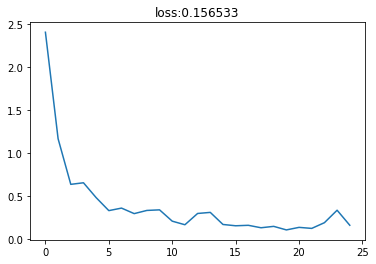

In [10]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

### Visualize the results

0.2859427363895827
-0.6709788363325153


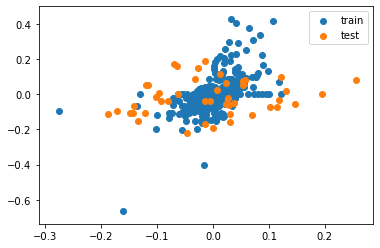

In [11]:
from sklearn.metrics import r2_score 
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label = 'test')  # plot test set
plt.legend(); plt.show()

### Combatting overfitting with dropout

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/25
255/255 [==============================] - 0s 1ms/step - loss: 0.1481
Epoch 2/25
255/255 [==============================] - 0s 52us/step - loss: 0.0642
Epoch 3/25
255/255 [==============================] - 0s 49us/step - loss: 0.0653
Epoch 4/25
255/255 [==============================] - 0s 52us/step - loss: 0.0390
Epoch 5/25
255/255 [==============================] - 0s 48us/step - loss: 0.0312
Epoch 6/25
255/255 [==============================] - 0s 51us/step - loss: 0.0323
Epoch 7/25
255/255 [==============================] - 0s 54us/step - loss: 0.0322
Epoch 8/25
255/255 [==============================] - 0s 58us/step - loss: 0.0277
Epoch 9/25
255/255 [==============================] - 0s 51us/step - loss: 0.0343
Epoch 10/25
255/255 [==============================] - 0s 45us/step - loss: 0.0237
Epoch 11/25
255/255 [==============================] - 0s 40us/st

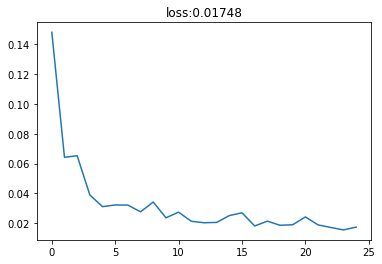

In [12]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

### Ensembling models

In [13]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis = 1)
print(test_preds[-5:])

[-0.06061152  0.01228654 -0.02935047 -0.02688826  0.02536028]


### See how the ensemble performed

0.4487271857274632
-0.2595062190445172


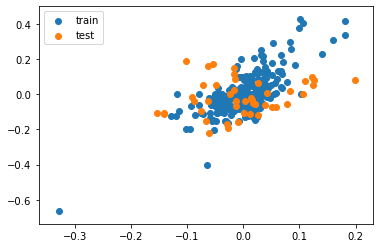

In [14]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label = 'train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

## Machine learning with modern portfolio theory

### Join stock DataFrames and calculate returns

In [17]:
lng = pd.read_csv('LNG.csv', parse_dates = ['Date'], index_col='Date')

lng = lng.drop('Adj_Volume', axis = 1)
spy = pd.read_csv('SPY.csv', parse_dates = ['Date'], index_col='Date')
spy = spy.drop('Adj_Volume', axis = 1)
smlv = pd.read_csv('SMLV.csv', parse_dates = ['Date'], index_col='Date')
smlv = smlv.drop('Adj_Volume', axis = 1)


In [18]:
# Join 3 stock dataframes together
full_df = pd.concat([lng, spy, smlv], axis=1).dropna()

full_df.columns = ['LNG', 'SPY', 'SMLV']

# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

# Calculate daily returns of stocks
returns_daily = full_df.pct_change()

# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
returns_monthly.tail()

,LNG,SPY,SMLV
Date,,,
2017-12-01,0.019558,0.027069,0.029058
2018-01-01,0.128300,0.021450,-0.010725
2018-02-01,0.057770,0.047662,-0.003823
2018-03-01,-0.103353,-0.049293,-0.048131
2018-04-02,0.021396,-0.034367,0.009406


### Calculate covariances for volatility

In [20]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

           LNG       SPY      SMLV
LNG   0.000366  0.000192  0.000146
SPY   0.000192  0.000173  0.000127
SMLV  0.000146  0.000127  0.000103


### Calculate portfolios

In [22]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(10):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)
        
print(portfolio_weights[date][0])

[0.52654913 0.2160861  0.25736477]


### Plot efficient frontier

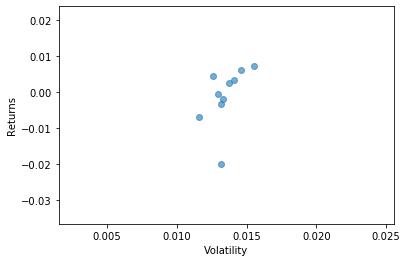

In [24]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]  

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date],  alpha=0.6)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

### Get best Sharpe ratios

In [25]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

0.007233636852009793


### Calculate EWMAs

In [26]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

LNG    -0.004304
SPY    -0.001003
SMLV   -0.001670
Name: 2018-04-02 00:00:00, dtype: float64


### Make features and targets

In [27]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

[[1.09503310e-01 6.43571483e-01 2.46925207e-01]
 [5.78315612e-01 2.35976016e-01 1.85708372e-01]
 [5.93106482e-01 4.06668084e-01 2.25434030e-04]
 [1.88778263e-02 6.93498053e-01 2.87624120e-01]
 [6.16053142e-01 2.18363137e-01 1.65583720e-01]]


### Plot efficient frontier with best Sharpe ratio

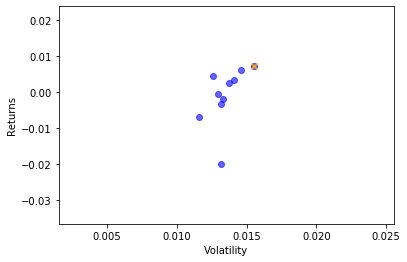

In [29]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.6, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

### Make predictions with a random forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.8117131260514038
-0.38497805112199457


/Users/huiren/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/huiren/anaconda3/envs/keras/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r

### Get predictions and first evaluation

/Users/huiren/anaconda3/envs/keras/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


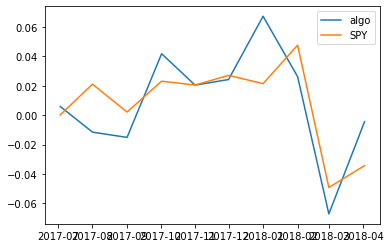

In [32]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
plt.plot(returns_monthly['SPY'].iloc[train_size:], label='SPY')
plt.legend()
plt.show()

### Evaluate returns